In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


In [28]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data = train_dataset.data[:128].float()
train_data = train_data.unsqueeze(1) / 255.  
train_targets = torch.Tensor(np.random.binomial(1, 0.5, 128)).long()  

test_data = test_dataset.data.float()
test_data = test_data.unsqueeze(1) / 255. 
#check hereeee
test_targets = torch.Tensor(np.random.binomial(1, 0.5, 128)).long()

In [23]:
class FCNet(nn.Module):
    def __init__(self):
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2) 

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = FCNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
epochs = 1000
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=list(zip(train_data, train_targets)), batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=list(zip(test_data, test_targets)), batch_size=batch_size, shuffle=False)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
    loss_epoch_val = running_loss / len(train_loader)
    print(loss_epoch_val)
    train_losses.append(loss_epoch_val)
    train_accuracies.append(correct / total)
    

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(correct / total)



0.7046629190444946
0.6894164085388184
0.6824671626091003
0.6755634546279907
0.6672506332397461
0.6575586795806885
0.6473616361618042
0.6362342238426208
0.6237100958824158
0.6100608110427856
0.5954079627990723
0.5794949531555176
0.5625267624855042
0.5449965000152588
0.5267947316169739
0.507835328578949
0.48827898502349854
0.4678247570991516
0.44634193181991577
0.4239853322505951
0.40075060725212097
0.37686625123023987
0.3529280126094818
0.32851624488830566
0.3042237162590027
0.2802809476852417
0.2570524513721466
0.23456604778766632
0.21292012929916382
0.1923699676990509
0.17288324236869812
0.15452750027179718
0.13744749128818512
0.12160266935825348
0.1071578711271286
0.0941212922334671
0.08238047361373901
0.07187429070472717
0.06256270408630371
0.054321546107530594
0.047075506299734116
0.04075060784816742
0.035204414278268814
0.030350659042596817
0.026173576712608337
0.022577710449695587
0.01948721706867218
0.01687452383339405
0.014656797982752323
0.012760382145643234
0.0111474553123116

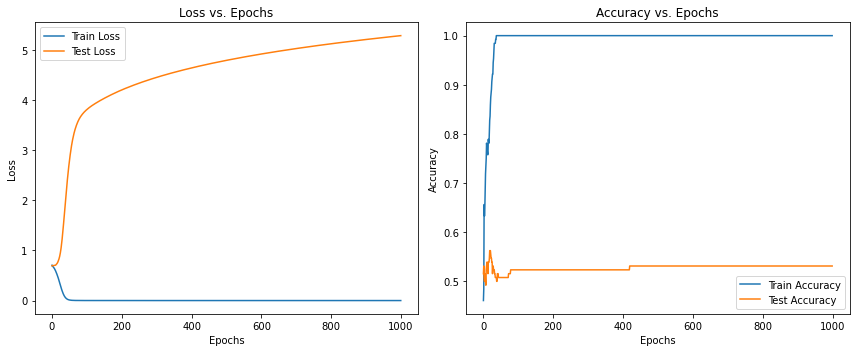

0.53125

In [25]:
# Plotting results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print final test accuracy
final_test_accuracy = test_accuracies[-1]
final_test_accuracy


In [36]:
from IPython.display import HTML

html_content = """
<ul>
  <li><b>As we add more epochs, we can see that training accuracy is close to 1.</b> This indicates that the model is effectively learning from the training data, fitting very closely to it.</li>
  <li><b>As we add more epochs, the test accuracy is nearly random and converges to 1/2.</b> This suggests that the model does not generalize well to new, unseen data, performing no better than random guessing in a binary classification task.</li>
  <li><b>The training loss is nearly 0, which is a classic indication of overfitting.</b> Overfitting occurs when the model learns the details and noise in the training data to the extent that it negatively impacts the performance on new data.</li>
</ul>
"""

# Display the HTML content
HTML(html_content)


### a) EDA 

<p style="font-size: 17px">
Exploring and analyzing the data. 
</p>

In [1]:
import numpy as np
import pandas as pd
import random

# import Data
train_df = pd.read_csv('trainEmotions.csv')
train = train_df.to_numpy()
test_df = pd.read_csv('testEmotions.csv')
test = test_df.to_numpy()

In [2]:
# build glove embedding
glove_path = '/Users/ranykhirbawi/Desktop'
glove = {}

with open(f'{glove_path}/glove.twitter.27B.100d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        vect = np.array(line[1:]).astype(np.float)
        glove[word] = vect

In [3]:
global_i = [0,0,0]
arr = []
for i in range(3):
    arr.append([])

def categoryFromOutput(output):
    """
    Extracts the category label from the model output.
    
    Args:
    - output: Tensor representing the output probabilities from the model
    
    Returns:
    - category: Category label
    - category_i: Index of the category in the category list
    """
    max_val, argmax = output.max(dim=1,  keepdim=True)
    category_i = argmax.item()
    return all_categories[category_i], category_i

def randomChoice(l,category):
    """
    Randomly selects an element from a list for a given category.
    
    Args:
    - l: List of items to choose from
    - category: Category index
    
    Returns:
    - Randomly selected item from the list
    """
    if global_i[category] % (len(l)) == 0:
        arr[category] = [i for i in range(len(l))]
        random.shuffle(arr[category])
        global_i[category] = 0
    global_i[category] += 1
    return l[arr[category][global_i[category]-1]]


In [4]:
def randomTrainingExample():
    category = all_categories[random.randint(0,2)]
    line = randomChoice(category_lines[category],category)
    characters = [',','.',';',':','"','=','?','!','#','&','*','(',')','-','_','+','$','%','^','\t']
    for ch in characters:
        line.replace(ch, " ")
    temp = line.split(" ")
    line = []
    for word in temp:
        s = ''.join(ch for ch in word if ch.isalnum())
        if word == '' or word == ' ':
            continue
        if word[0] == '@':
            word = 'username'
        line.append(s)
    category = torch.LongTensor([category])
    return category, line


**Data cleaning and processing:**

We first converted our train set and test set files (CSV format) into data frames, then further processed them into NumPy arrays. Extracting meaningful insights from textual data presents challenges since individuals often express their feelings and emotions in natural and nuanced ways. Consequently, the data extracted from tweets tends to be highly unstructured, posing difficulties for machine-based emotion analysis. To mitigate this, we applied preprocessing techniques to clean the tweets of extraneous information. This involved removing all special characters from both our training and testing sets and replacing them with spaces. We reasoned that learning these special characters would not significantly impact our model's performance. Additionally, we attempted stemming to convert words into their root forms, aiming to streamline the text and reduce computational overhead. However, despite these efforts, we found that stemming did not improve the accuracy of our model. Moreover, we converted all the tweets to lowercase to ensure uniformity in text processing. Given that Twitter allows users to mention others and include hashtags in their tweets to provide context, we opted to remove user mentions and replace them with "username" to preserve the overall meaning of the sentences.

*****************************

### b) Main 

<p style="font-size: 17px">
Define 2 models, as requested. Train and eval them.

</ul>

</p>

In [46]:
import torch.nn as nn
import torch
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(hidden_size + input_size, hidden_size)
        self.i2o = nn.Linear(hidden_size + input_size, output_size)
        self.logsoftmax = nn.LogSoftmax(dim=-1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1).to(torch.float32)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.logsoftmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaRNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = torch.tanh(self.i2h(combined))
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [47]:
def train_data(category, line, model, optimizer, criterion):
    hidden = model.initHidden()
    optimizer.zero_grad()
    bol = 0
    for i in range(len(line)):
        try:
            output, hidden = model(torch.from_numpy(np.array([glove[line[i].lower()]]).astype(float)), hidden)
            bol+=1
        except:
            continue
    if bol == 0:
        ran = np.random.randint(0,2)
        arr = [0,0,0]
        arr[ran] = 1
        output = torch.from_numpy(np.array([arr]).astype(float))
        loss = criterion(output, category)
        return output, loss.item()
    loss = criterion(output, category)
    loss.backward()
    optimizer.step()
    return output, loss.item()

def test_data(category, line, model, criterion):
    hidden = model.initHidden()
    bol = 0
    for i in range(len(line)):
        try:
            output, hidden = model.forward(torch.from_numpy(np.array([glove[line[i].lower()]]).astype(float)), hidden)
            bol+=1
        except:
            continue
    if bol == 0:
        arr = [0,0,0]
        ran = np.random.randint(0,2)
        arr[ran] = 1
        output = torch.from_numpy(np.array([arr]).astype(float))
    loss = criterion(output, category)
    return output,loss.item()


In [57]:
category_lines = {}
category_lines[0] = []
category_lines[1] = []
category_lines[2] = []
for t in train:
    category = 0 if t[0] == 'happiness' else 1 if t[0] == 'neutral' else 2
    category_lines[category].append(t[1])
all_categories = [0,1,2]
n_categories = 3

def run_models(m, lr, is_True):
    n_hidden = 50

    model = m(100, n_hidden, n_categories)

    criterion = nn.NLLLoss()
    learning_rate = lr
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    
    
    if is_True:
        test_model = test[:500]
        train_model = train[:700]
        n_iters = 10000
        print_every = 500
        plot_every = 500
    else:
        test_model = test
        train_model = train

        n_iters = 200000
        print_every = 10000
        plot_every = 10000

    all_losses_test = []
    all_accuracies_test = []
    

    current_loss_train = 0
    all_losses_train = []
    all_accuracies_train = []

    accuracy = 0
    counter = 0

    for iter in range(1, n_iters + 1):
        
        category, line = randomTrainingExample()
        output, loss = train_data(category, line, model, optimizer, criterion)
        current_loss_train += loss
        guess, guess_i = categoryFromOutput(output)
        if guess == category:
            accuracy += 1
        counter += 1
        # Print iter number, loss, name and guess
        

        if iter % print_every == 0:
           
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% %.4f %s / %s %s accuracy: %.4f' % (iter, iter / n_iters * 100,
                                                              loss, line,
                                                              guess, correct, accuracy / counter))
        

        # Add current loss avg to list of losses
        if iter % plot_every == 0:
           
            all_losses_train.append(current_loss_train / plot_every)
            all_accuracies_train.append(accuracy / counter)
            current_loss_train = 0
            
            current_loss_test = 0
            counter_test = 0
            accuracy_test = 0
            for row in test_model:
                line = []
                characters = [',', '.', ';', ':', '"', '=', '?', '!', '#', '&', '*', '(', ')', '-', '_', '+', '$', '%', '^','\t']
                temp1 = row[1]
                for ch in characters:
                    temp1.replace(ch, " ")
                temp = temp1.split(" ")
                for word in temp:
                    if word == '' or word == ' ':
                        continue
                    if word[0] == '@':
                        word = 'username'
                    s = ''.join(ch for ch in word if ch.isalnum())
                    line.append(s)
                category = row[0]
                category = 0 if row[0] == 'happiness' else 1 if row[0] == 'neutral' else 2
                category = torch.LongTensor([category])
                output, loss = test_data(category, line, model, criterion)
                
                if guess == category:
                    accuracy_test += 1
                counter_test += 1
                
                current_loss_test += loss
            all_losses_test.append(current_loss_test / len(test))
            all_accuracies_test.append(accuracy_test / counter_test)
            
    current_loss = 0
    accuracy_test = 0
    counter_test = 0
    confusion_mat_test = [[0,0,0],[0,0,0],[0,0,0]]
    len_confusion_test = [0,0,0]
    for row in test_model:
        line = []
        characters = [',','.',';',':','"','=','?','!','#','&','*','(',')','-','_','+','$','%','^','\t']
        temp1 = row[1]
        for ch in characters:
            temp1.replace(ch, " ")
        temp = temp1.split(" ")
        for word in temp:
            if word == '' or word == ' ':
                continue
            if word[0] == '@':
                word = 'username'
            s = ''.join(ch for ch in word if ch.isalnum())
            line.append(s)
        category = row[0]
        category = 0 if row[0] == 'happiness' else 1 if row[0] == 'neutral' else 2
        category = torch.LongTensor([category])
        output,loss = test_data(category, line, model, criterion)
    
        # Print iter number, loss, name and guess
        guess, guess_i = categoryFromOutput(output)
        if guess == category:
            accuracy_test += 1
        
        confusion_mat_test[guess][category] += 1
        len_confusion_test[guess] += 1
        counter_test += 1
    for guess in range(3):
        for category in range(3):
            try:
                confusion_mat_test[guess][category] = confusion_mat_test[guess][category]/len_confusion_test[guess]
            except:
                confusion_mat_test[guess][category] = 0

    current_loss = 0
    all_losses = []
    accuracy_arr = []
    accuracy_train = 0
    counter_train = 0
    confusion_mat_train = [[0,0,0],[0,0,0],[0,0,0]]
    len_confusion_train = [0,0,0]
    for row in train_model:
        line = []
        characters = [',','.',';',':','"','=','?','!','#','&','*','(',')','-','_','+','$','%','^','\t']
        temp1 = row[1]
        for ch in characters:
            temp1.replace(ch, " ")
        temp = temp1.split(" ")
        for word in temp:
            if word == '' or word == ' ':
                continue
            if word[0] == '@':
                word = 'username'
            s = ''.join(ch for ch in word if ch.isalnum())
            line.append(s)
        category = row[0]
        category = 0 if row[0] == 'happiness' else 1 if row[0] == 'neutral' else 2
        category = torch.LongTensor([category])
        output,loss = test_data(category, line, model, criterion)

        guess, guess_i = categoryFromOutput(output)
        if guess == category:
            accuracy_train += 1
        confusion_mat_train[guess][category] += 1
        len_confusion_train[guess] += 1
        counter_train += 1
    for guess in range(3):
        for category in range(3):
            try:
                confusion_mat_train[guess][category] = confusion_mat_train[guess][category]/len_confusion_train[guess]
            except:
                confusion_mat_train[guess][category] = 0
    print(f'{m} train accuracy with learning rate {learning_rate}: {accuracy_train/counter_train}')
    print(f'{m} test accuracy with learning rate{learning_rate}: {accuracy_test/counter_test}')

    return all_accuracies_train, all_accuracies_test, all_losses_train, all_losses_test, confusion_mat_train, confusion_mat_test


In [55]:
all_accuracies_train_Vanilla, all_accuracies_test_Vanilla, all_losses_train_Vanilla, all_losses_test_Vanilla, confusion_mat_train_Vanilla, confusion_mat_test_Vanilla = run_models(VanillaRNN, 0.001,True)


500 5% -1.0000 ['lizajbeck', 'You', 'did', 'know', 'you', 'just', 'couldnt', 'remember'] / 1 ✓ accuracy: 0.3100
1000 10% 0.0000 ['ksutt11', 'ohhhh', 'thunderstormsboo', 'why', 'do', 'they', 'always', 'have', 'to', 'make', 'the', 'power', 'go', 'out'] / 0 ✗ (tensor([2])) accuracy: 0.3340
1500 15% 0.0000 ['Basil', 'will', 'be', 'the', 'highlight', 'of', 'my', 'day', 'Ive', 'just', 'had', 'an', 'old', 'man', 'lecture', 'me', 'on', 'the', 'greatness', 'of', 'the', 'Telegraph', 'What', 'an', 'idiot'] / 1 ✗ (tensor([2])) accuracy: 0.3340
2000 20% -1.0000 ['jakolien', 'hee', 'hee', '', 'btw', 'thanks', 'for', 'your', 'LinkedIn', 'tips', '', 'ive', 'still', 'to', 'use', 'them', 'but', 'thanks', 'in', 'advance'] / 1 ✓ accuracy: 0.3350
2500 25% -1.0000 ['aknotofemma', 'See', 'we', 'shall'] / 1 ✓ accuracy: 0.3316
3000 30% 0.0000 ['Its', 'a', 'Peter', 'amp', 'Gordon', 'morning', 'gt', 'And', 'I', 'go', 'to', 'pieces', 'and', 'I', 'wanna', 'hide', '', 'Go', 'to', 'pieces', 'and', 'I', 'almost', 'di

In [58]:
all_accuracies_train_rnn_1, all_accuracies_test_rnn_1, all_losses_train_rnn_1, all_losses_test_rnn_1, confusion_mat_train_rnn_1, confusion_mat_test_rnn_1 = run_models(RNN, 0.001,False)


10000 5% 0.8490 ['bpmore', 'that', 'last', 'one', 'was', 'just', 'for', 'you'] / 0 ✓ accuracy: 0.5334
20000 10% 2.0604 ['To', 'all', 'moms', 'out', 'there', 'Happy', 'mothers', 'day'] / 0 ✗ (tensor([1])) accuracy: 0.5536
30000 15% 1.2795 ['laylaymusic', 'you', 'know', 'you', 'love', 'it', 'StatK'] / 0 ✗ (tensor([1])) accuracy: 0.5697
40000 20% 0.1755 ['amandabynes', 'omg', 'in', 'your', 'pic', 'youu', 'look', 'so', 'cuute', ''] / 0 ✓ accuracy: 0.5788
50000 25% 1.1624 ['GlitzyGloss', 'Hello', 'sounds', 'very', 'good', 'you', 'can', 'count', 'on', 'me', 'I', 'follow', 'you'] / 1 ✗ (tensor([0])) accuracy: 0.5856
60000 30% 0.2333 ['santojay', 'They', 'assume', 'you', 'wont', 'be', 'able', 'to', 'afford', 'traveling', 'anymore', 'now', 'that', 'youve', 'got', 'a', 'contract', 'with', 'them'] / 2 ✓ accuracy: 0.5889
70000 35% 1.2879 ['at', 'workyy', 'trying', 'to', 'get', 'on', 'point', 'with', 'all', 'that', 'I', 'have', 'to', 'do', 'smile', 'lt3LinMan', 'tonight'] / 1 ✗ (tensor([0])) accura

In [59]:
all_accuracies_train_rnn_2, all_accuracies_test_rnn_2, all_losses_train_rnn_2, all_losses_test_rnn_2, confusion_mat_train_rnn_2, confusion_mat_test_rnn_2 = run_models(RNN, 0.01,False)


10000 5% 0.0013 ['liz920', 'I', 'would', 'notice'] / 1 ✓ accuracy: 0.3648
20000 10% 0.0000 ['MY', 'AUNTIE', 'FROM', 'QUEENSLAND', 'IS', 'DOWN', 'TO', 'STAY', 'THE', 'NIGHT', 'YAYA'] / 0 ✓ accuracy: 0.3713
30000 15% 6.1278 ['Dance', 'this', 'morning', 'before', 'getting', 'new', 'headshots', 'taken', 'loooong', 'but', 'fun', 'day', 'ahead'] / 0 ✗ (tensor([1])) accuracy: 0.3837
40000 20% 0.0000 ['Whooops', 'wrong', 'smiley', 'its', 'supposed', 'to', 'be', 'LOL'] / 1 ✓ accuracy: 0.3719
50000 25% 1263463.6250 ['yay', 'joss', 'is', 'coming', 'over', 'on', 'saturday'] / 0 ✗ (tensor([1])) accuracy: 0.3594
60000 30% 0.0000 ['dance', 'gavin', 'danceattack', 'attacka', 'skylit', 'drive', 'tonight', 'im', 'so', 'exciteddddd'] / 0 ✓ accuracy: 0.3516
70000 35% 3373175.0000 ['i', 'have', 'geographie', 'next', 'and', 'I', 'HATE', 'IT'] / 1 ✗ (tensor([2])) accuracy: 0.3447
80000 40% 27778976592166912.0000 ['has', 'bronchitis', 'and', 'is', 'on', '3', 'prescriptions', 'No', 'fun', 'at', 'all', 'Had', '

In [60]:
all_accuracies_train_rnn_3, all_accuracies_test_rnn_3, all_losses_train_rnn_3, all_losses_test_rnn_3, confusion_mat_train_rnn_3, confusion_mat_test_rnn_3 = run_models(RNN, 0.0001, False)


10000 5% 0.9806 ['acousticalt', 'Ill', 'be', 'listening'] / 0 ✓ accuracy: 0.5151
20000 10% 0.2298 ['skysignal', 'as', 'long', 'as', 'it', 'can', 'select', 'what', 'to', 'post', 'and', 'what', 'not', 'to', 'post', 'Im', 'in', 'we', 'should', 'tell', 'the', 'others'] / 1 ✓ accuracy: 0.5593
30000 15% 1.2837 ['Bearablescents', 'The', 'SiteWarming', 'parties', 'usually', 'do', 'very', 'wellif', 'I', 'do', 'say', 'so', 'myself', 'sigjeans'] / 2 ✗ (tensor([1])) accuracy: 0.5784
40000 20% 1.4967 ['EllaPaigeBabe', 'It', 'would', 'be', 'amazing', 'if', 'we', 'could', 'meet', 'us', 'in', 'Germany', 'I', 'have', 'been', 'to', 'Germany', 'twice'] / 2 ✗ (tensor([1])) accuracy: 0.5924
50000 25% 3.2161 ['Wishing', 'all', 'MOMs', 'a', 'very', 'Happy', 'Mothers', 'Day'] / 0 ✗ (tensor([1])) accuracy: 0.6001
60000 30% 0.8513 ['dlayphoto', 'Yes', 'Koi', 'for', 'a', 'few', 'years', 'now', 'and', 'they', 'have', 'had', 'babies', 'as', 'well', 'Biggest', 'ones', 'almost', '2', 'ft', 'long', 'now', 'and', 'the

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(confusion_matrix, classes):
    num_classes = len(classes)

    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()




In [62]:
import matplotlib.pyplot as plt

def plot_losses(all_losses_train, all_losses_test):
    # Ensure all lists have the same length
    min_length = min(len(all_losses_train), len(all_losses_test))
    all_losses_train = all_losses_train[:min_length]
    all_losses_test = all_losses_test[:min_length]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, min_length + 1), all_losses_train, label='Train Loss')
    plt.plot(range(1, min_length + 1), all_losses_test, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss as a Function of Epochs')
    plt.legend()
    plt.show()




In [63]:

def plot_accuracies(all_accuracies_train, all_accuracies_test):
    # Ensure all lists have the same length
    min_length = min(len(all_accuracies_train), len(all_accuracies_test))
    all_accuracies_train = all_accuracies_train[:min_length]
    all_accuracies_test = all_accuracies_test[:min_length]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, min_length + 1), all_accuracies_train, label='Train Accuracy')
    plt.plot(range(1, min_length + 1), all_accuracies_test, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy as a Function of Epochs')
    plt.legend()
    plt.show()


The result of model RNN :
with learning rate : 0.001
Train Confusion Matrix :


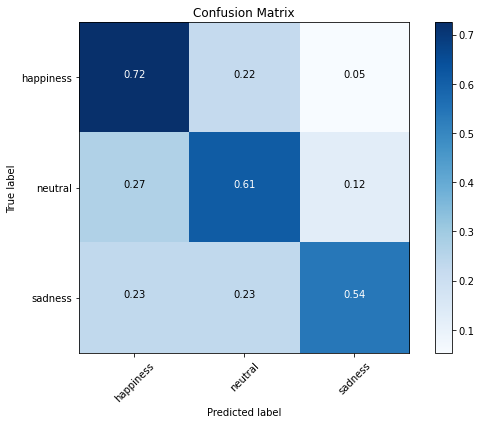

Test Confusion Matrix :


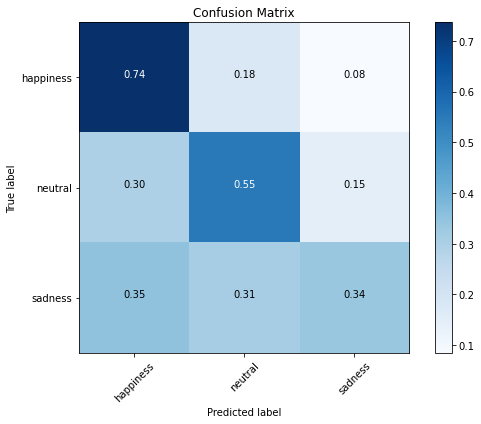

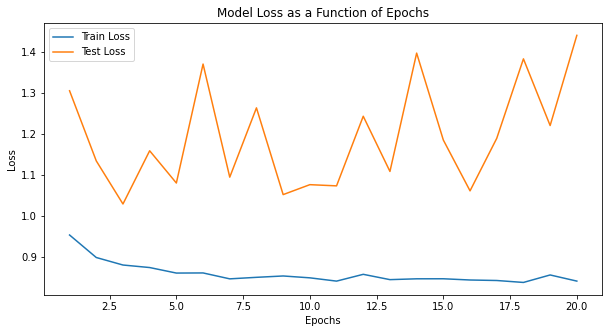

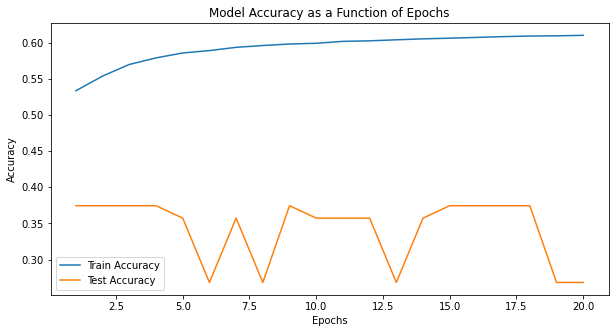

In [64]:
classes = ['happiness', 'neutral', 'sadness']
print("The result of model RNN :")

print("with learning rate : 0.001")
print("Train Confusion Matrix :")

plot_confusion_matrix(np.array(confusion_mat_train_rnn_1),classes)

print("Test Confusion Matrix :")
plot_confusion_matrix(np.array(confusion_mat_test_rnn_1),classes)

plot_losses(all_losses_train_rnn_1, all_losses_test_rnn_1)
plot_accuracies(all_accuracies_train_rnn_1, all_accuracies_test_rnn_1)






The result of model RNN :
with learning rate : 0.01
Train Confusion Matrix :


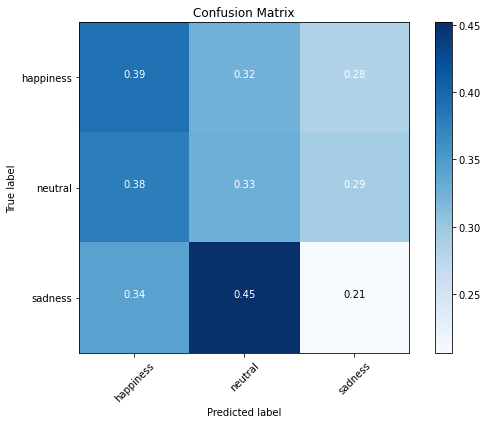

Test Confusion Matrix :


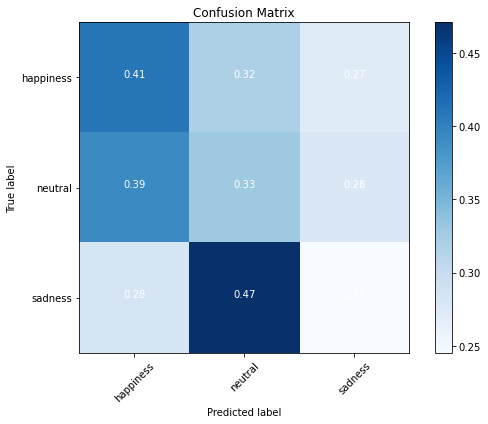

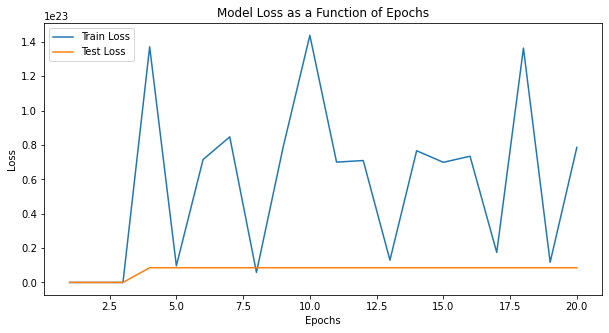

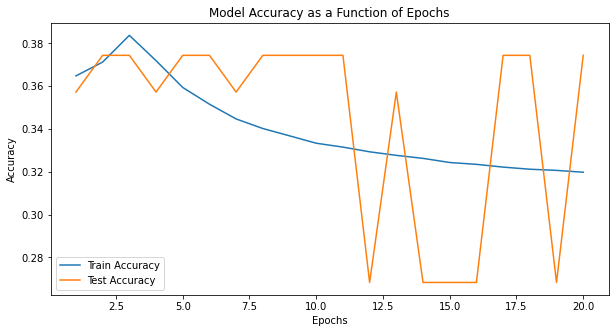

In [65]:
print("The result of model RNN :")

print("with learning rate : 0.01")
print("Train Confusion Matrix :")

plot_confusion_matrix(np.array(confusion_mat_train_rnn_2),classes)

print("Test Confusion Matrix :")
plot_confusion_matrix(np.array(confusion_mat_test_rnn_2),classes)

plot_losses(all_losses_train_rnn_2, all_losses_test_rnn_2)
plot_accuracies(all_accuracies_train_rnn_2 , all_accuracies_test_rnn_2)


The result of model RNN :
with learning rate : 0.0001
Train Confusion Matrix :


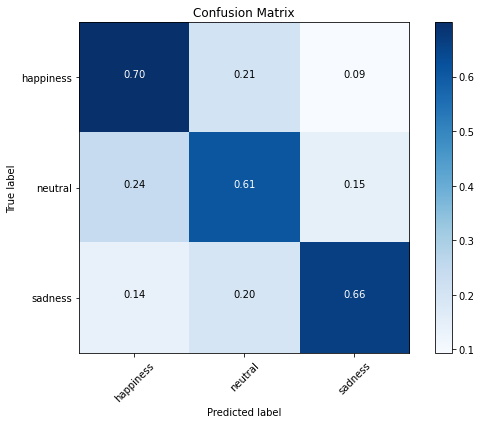

Test Confusion Matrix :


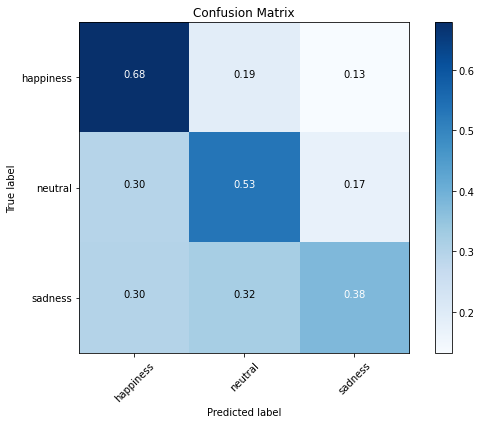

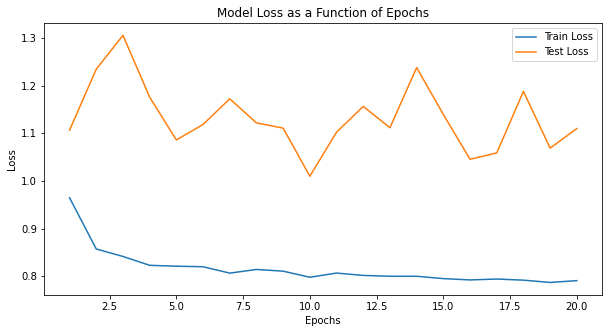

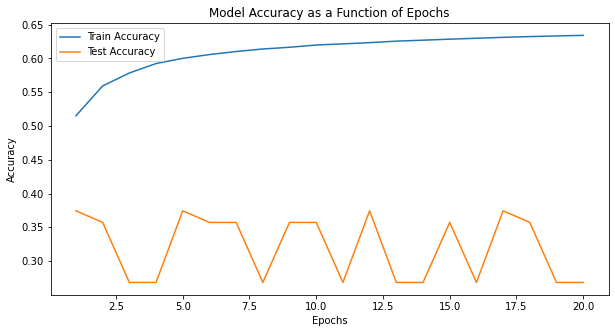

In [66]:
print("The result of model RNN :")

print("with learning rate : 0.0001")
print("Train Confusion Matrix :")

plot_confusion_matrix(np.array(confusion_mat_train_rnn_3),classes)

print("Test Confusion Matrix :")
plot_confusion_matrix(np.array(confusion_mat_test_rnn_3),classes)

plot_losses(all_losses_train_rnn_3, all_losses_test_rnn_3)
plot_accuracies(all_accuracies_train_rnn_3, all_accuracies_test_rnn_3)


The result of model VanillaRNN :
Train Confusion Matrix :


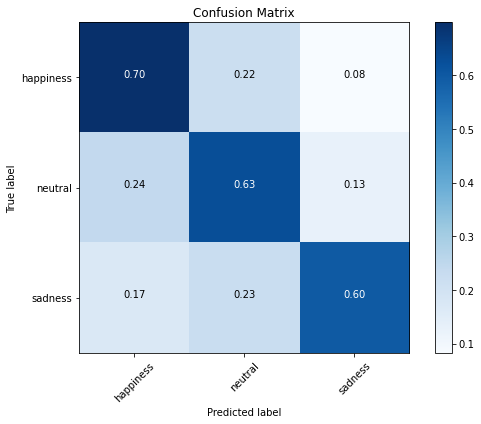

Test Confusion Matrix :


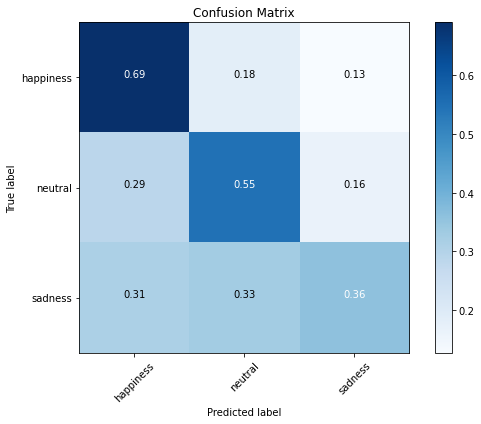

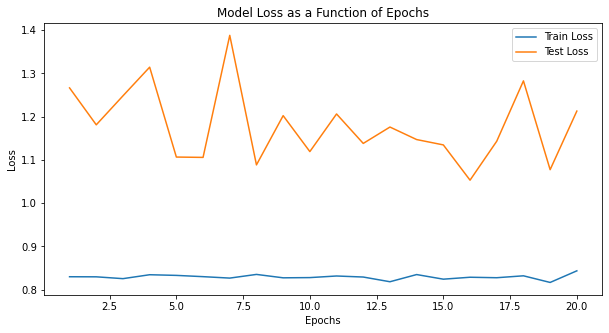

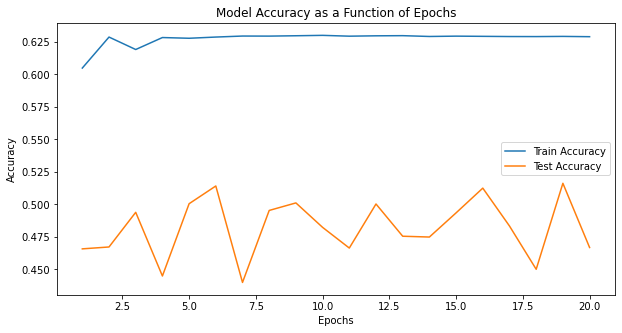

In [69]:

print("The result of model VanillaRNN :")
print("Train Confusion Matrix :")

plot_confusion_matrix(np.array(confusion_mat_train_Vanilla),classes)

print("Test Confusion Matrix :")
plot_confusion_matrix(np.array(confusion_mat_test_Vanilla),classes)

plot_losses(all_losses_train_Vanilla, all_losses_test_Vanilla)
plot_accuracies(all_accuracies_train_Vanilla, all_accuracies_test_Vanilla)



*****************************

### c) Discussion 
<p style="font-size: 17px">

</p>

We impelemnt two models: RNN and VanillaRNN. Got the best results in VanillaRNN (0.5 accuracy on test set) but we notice that its plots are not stable, so we don't think it's the best choice for our mission.

We think RNN model is the best in our situation. This approach operates on the premise that instead of applying convolutions directly to image pixels, the model can leverage convolutions within the embedded feature space of words in a sentence.

We opted to feed words into the RNN model rather than individual letters. This decision stems from the recognition that training the model on letters alone would be considerably more challenging for it to discern the emotional context of a sentence. To address this, we utilized GloVe as an embedding system, facilitating the conversion of words into vector representations.

We experimented with several GloVe files and ultimately selected "glove.twitter.27B.100d" as our preferred choice. Additionally, we determined the optimal hidden size through experimentation, identifying that 50 yielded the highest test accuracy.

We used Adam optimizer and we tried different learning rates. We got the best results when the learning rate was: 0.0001.

We tried different loss function like Cross-Entropy and NLLLoss, we got better results when we used NLLLoss.
With Cross-Entropy we got 0.44 test accuracy and with NLLLoss we got 0.48 test accuracy.

Also, we tried different hyper parameters and we got the best results with: 

**Hyper parameters:**

- Learning rate : 0.0001
- n_hidden : 50 
- n_iters: 200,000
